João Bassi

Matérias usadas:


In [46]:
'''
1971: Multa de trânsito será enviada para a residência de motorista infrator
https://www1.folha.uol.com.br/banco-de-dados/2021/01/1971-multa-de-transito-sera-enviada-para-a-residencia-de-motorista-infrator.shtml

1970: Estados Unidos usam golfinhos como 'arma secreta' no Vietnã
https://www1.folha.uol.com.br/banco-de-dados/2020/12/1970-estados-unidos-usam-golfinhos-como-arma-secreta-no-vietna.shtml

1971: Soldados do Vietnã do Sul invadem Laos com apoio dos EUA
https://www1.folha.uol.com.br/banco-de-dados/2021/02/1971-soldados-do-vietna-do-sul-invadem-laos-com-apoio-dos-eua.shtml

1971: Ministro defende AI-5 e diz que ideia de liberdade absoluta se modificou
https://www1.folha.uol.com.br/banco-de-dados/2021/02/1971-ministro-defende-ai-5-e-diz-que-ideia-de-liberdade-absoluta-se-modificou.shtml

1971: Ingleses propõem que Nobel da Paz seja entregue aos irmãos Villas Bôas
https://www1.folha.uol.com.br/banco-de-dados/2021/02/1971-ingleses-propoem-que-nobel-da-paz-seja-entregue-aos-irmaos-villas-boas.shtml

1971: Nixon afirma que EUA não usarão arma nuclear na Guerra do Vietnã
https://www1.folha.uol.com.br/banco-de-dados/2021/02/1971-nixon-afirma-que-eua-nao-usarao-arma-nuclear-na-guerra-do-vietna.shtml

1971: Palácio dos Campos Elíseos passa a abrigar Museu da Imagem e do Som
https://www1.folha.uol.com.br/banco-de-dados/2021/01/1971-palacio-dos-campos-eliseos-passa-a-abrigar-museu-da-imagem-e-do-som.shtml

1970: Encarecimento do custo de vida provoca rebelião popular na Polônia
https://www1.folha.uol.com.br/banco-de-dados/2020/12/1970-encarecimento-do-custo-de-vida-provoca-rebeliao-popular-na-polonia.shtml

1971: Estiagem atinge região norte de São Paulo e provoca desemprego
https://www1.folha.uol.com.br/banco-de-dados/2021/02/1971-estiagem-atinge-regiao-norte-de-sao-paulo-e-provoca-desemprego.shtml

1971: Petrobras intensifica pesquisas no mar e contrata 2 navios-sonda
https://www1.folha.uol.com.br/banco-de-dados/2021/02/1971-petrobras-intensifica-pesquisas-no-mar-e-contrata-2-navios-sonda.shtml
'''


# Bibliotecas
# Libs

In [13]:
import requests 
import pymongo
import spacy
import sklearn
import re
import wordcloud

import numpy             as np                                   
import pandas            as pd                                  
import sklearn.metrics   as metrics                              
import matplotlib.pyplot as plt

from pymongo                         import MongoClient        
from bs4                             import BeautifulSoup      
from sklearn.feature_extraction.text import CountVectorizer    
from sklearn.naive_bayes             import MultinomialNB     
from sklearn.model_selection         import cross_val_predict  
from spacy                           import displacy           
from spacy.tokens                    import Token
from wordcloud                       import WordCloud
from wordcloud                       import ImageColorGenerator
from PIL                             import Image


# Configurando MongoDB
# Setting MongoDB

In [15]:
client = MongoClient('localhost', 27017)                                          # configuração padrão do MongoDB         | default settings of MongoDB
db     = client.jbassi_avaliacao3                                                 # iniciando o banco de dados             | initializing database

# Trabalhando com o Dataset
# Working with Dataset

In [17]:
dataset = pd.read_csv('Tweets_Mg.csv',encoding='utf-8')                           # abrindo dataset Tweets                 | opening Tweets dataset 

**Construindo o Modelo com o dataset Tweets**

**Building a Model with the Tweets dataset**

In [25]:
txt_tweets  = dataset["Text"].values                                              # pegando o texto dos tweets             | getting the tweets text
classes     = dataset["Classificacao"].values                                     # separando classificação                | separating classification

**Treinando o modelo com o dataset Tweets**

**Training the model with Tweets dataset**

In [26]:
sentimentos = ["Positivo", "Negativo", "Neutro"]                                  # definindo medida de validação          | defining validation 
vectorizer  = CountVectorizer(ngram_range = (1, 2))                               # usando frequência bigramada            | using bigram frequency
freq_tweets = vectorizer.fit_transform(txt_tweets)                                # aplicando fit_transform nos txts       | applying fit_transform on txts  
modelo      = MultinomialNB()                                                     # iniciando modelo Multinomial           | starting Multinomial model                               
modelo.fit(freq_tweets, classes)                                                  # treinando                              | training

resultados  = cross_val_predict(modelo, freq_tweets, classes, cv = 10)            # pegando previsões                      | getting predicts
metrics.accuracy_score(classes, resultados)                                       # medindo a acurácia do modelo           | measuring the model accuracy


0.8954750579338944

In [27]:
print(metrics.classification_report(classes, resultados, sentimentos))            # mostrando as classificações            |showing the classifications

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=['Positivo', 'Negativo', 'Neutro'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
              precision    recall  f1-score   support

    Positivo       0.97      0.88      0.92      3300
    Negativo       0.91      0.93      0.92      2446
      Neutro       0.80      0.89      0.84      2453

    accuracy                           0.90      8199
   macro avg       0.89      0.90      0.89      8199
weighted avg       0.90      0.90      0.90      8199



# Pegando textos usando bs4
# Getting texts using bs4

In [28]:
# criando uma lista com todos as urls 
# creating a list of all urls

urls = ['https://www1.folha.uol.com.br/banco-de-dados/2021/01/1971-multa-de-transito-sera-enviada-para-a-residencia-de-motorista-infrator.shtml',
        'https://www1.folha.uol.com.br/banco-de-dados/2020/12/1970-estados-unidos-usam-golfinhos-como-arma-secreta-no-vietna.shtml',
        'https://www1.folha.uol.com.br/banco-de-dados/2021/02/1971-soldados-do-vietna-do-sul-invadem-laos-com-apoio-dos-eua.shtml',
        'https://www1.folha.uol.com.br/banco-de-dados/2021/02/1971-ministro-defende-ai-5-e-diz-que-ideia-de-liberdade-absoluta-se-modificou.shtml',
        'https://www1.folha.uol.com.br/banco-de-dados/2021/02/1971-ingleses-propoem-que-nobel-da-paz-seja-entregue-aos-irmaos-villas-boas.shtml',
        'https://www1.folha.uol.com.br/banco-de-dados/2021/02/1971-nixon-afirma-que-eua-nao-usarao-arma-nuclear-na-guerra-do-vietna.shtml',
        'https://www1.folha.uol.com.br/banco-de-dados/2021/01/1971-palacio-dos-campos-eliseos-passa-a-abrigar-museu-da-imagem-e-do-som.shtml',
        'https://www1.folha.uol.com.br/banco-de-dados/2020/12/1970-encarecimento-do-custo-de-vida-provoca-rebeliao-popular-na-polonia.shtml',
        'https://www1.folha.uol.com.br/banco-de-dados/2021/02/1971-estiagem-atinge-regiao-norte-de-sao-paulo-e-provoca-desemprego.shtml',
        'https://www1.folha.uol.com.br/banco-de-dados/2021/02/1971-petrobras-intensifica-pesquisas-no-mar-e-contrata-2-navios-sonda.shtml']

In [29]:
# Pegando textos com web scraping e extraindo informações da url
# Grabbing texts with web scraping and extracting information from the url

todos_textos =[]                                                                  # iniciando lista dos textos            | starting a list of texts
anos         =[]                                                                  # iniciando lista dos anos              | starting a list of texts years
titulos      =[]                                                                  # iniciando lista dos títulos           | starting a list of texts titles

for x in range(len(urls)):                                                        # iniciando laço                        | starting loop
    url  = requests.get(urls[x])                                                  # pegando url individual                | catching individual url
    soup = BeautifulSoup(url.content, 'html.parser')                              # transformando em objeto beautifulsoup | turning into beautifulsoup object
    text = ''                                                                     # preparando variável                   | preparing variable
    link = urls[x].replace('https://www1.folha.uol.com.br/banco-de-dados/', '')   # extraindo parte da url                | extracting part of url
    link = link.   replace(".shtml", "")                                          # limpando url                          | cleaning up url
    link = link.   replace("-", " ")                                              # limpando url                          | cleaning up url
    
    ano     = link[8:13]                                                          # pegando ano da matéria                | getting the year of text
    titulo  = link[13: ].title()                                                  # pegando o titulo da matéria           | getting the title of text
    anos.   append(ano)                                                           # atribuindo na lista                   | assigning on list
    titulos.append(titulo)                                                        # atribuindo na lista                   | assigning on list
    
    y    = soup.find('div', class_='c-news__body').find_all('p')                  # pegando parágrafo                     | getting text paragraph
                                                                                
    for i in y:                                                                   # iniciando outro laço                  | stating second loop
        text += ''.join(i.find_all(text= True))                                   # concatenando                          | concatenating                                                                           
    todos_textos.append(text)                                                     # adicionando o texto na lista          | add text on list

# Salvando no MongoDB
# Saving on MongoDB

materias = dict()                                                                 # criando um dicionário                 | creating a empty dict
for i in range(len(todos_textos)):                                                # iniciando loop                        | starting loop
    materias = {'Título': titulos[i], 'Ano': anos[i], 'Matéria': todos_textos[i]} # transformando em dicionário           | transforming in a dict

    db.textos.insert_one(materias)                                                # salvando no MongoDB                   | saving in MongoDB


**Carregando SpaCy**

**Loading SpaCy**

In [30]:
nlp = spacy.load("pt_core_news_md")                                               # carregando SpaCy em português         | loading Spacy in portuguese

# Gerando WordCloud

# Generating WordCloud
  

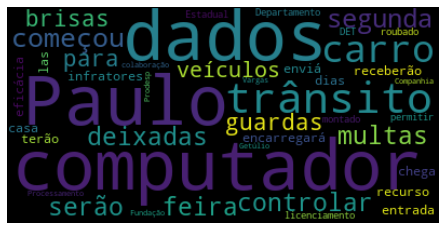

<Figure size 2160x1440 with 0 Axes>

Salvando imagem na pasta



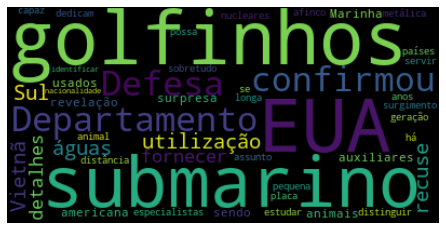

<Figure size 2160x1440 with 0 Axes>

Salvando imagem na pasta



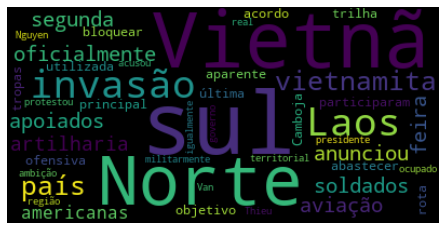

<Figure size 2160x1440 with 0 Axes>

Salvando imagem na pasta



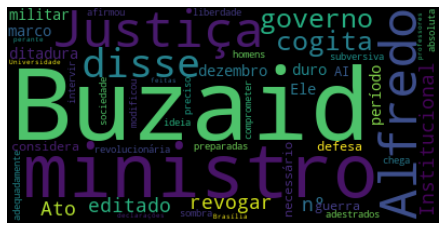

<Figure size 2160x1440 with 0 Axes>

Salvando imagem na pasta



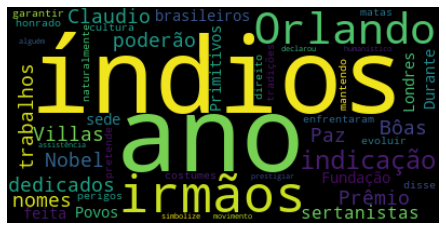

<Figure size 2160x1440 with 0 Axes>

Salvando imagem na pasta



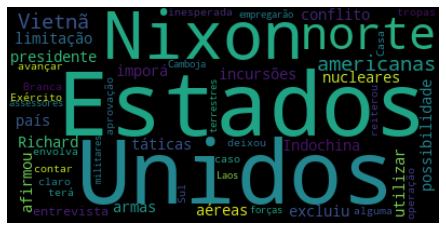

<Figure size 2160x1440 with 0 Axes>

Salvando imagem na pasta



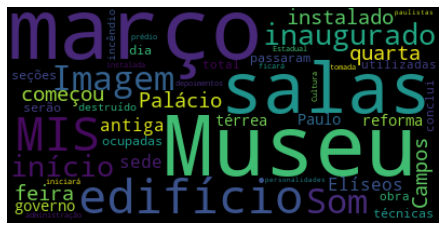

<Figure size 2160x1440 with 0 Axes>

Salvando imagem na pasta



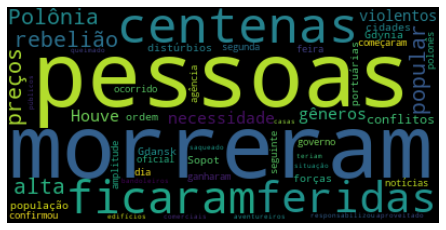

<Figure size 2160x1440 with 0 Axes>

Salvando imagem na pasta



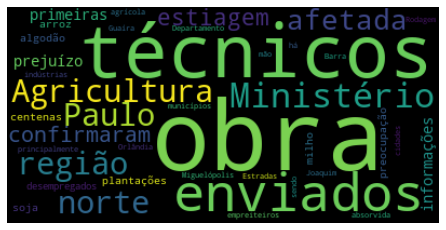

<Figure size 2160x1440 with 0 Axes>

Salvando imagem na pasta



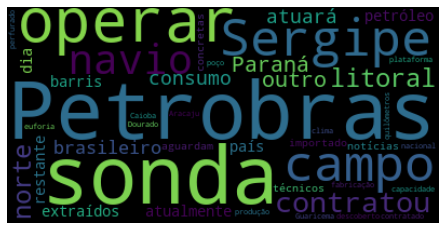

<Figure size 2160x1440 with 0 Axes>

Salvando imagem na pasta



In [31]:
wc        = WordCloud(background_color='black',                                   # definindo cor de fundo               | defining background color
                      height=1800, width=800,                                     # definindo dimensões                  | defining dimensions
                      max_font_size=40, min_font_size=20)                         # limites da fonte                     | font limits
# gerando img em um for com todas as matérias
#

for i in range(len(todos_textos)):                                                # iniciando loop                       | starting loop
    txt       = str(todos_textos[i])                                              # pegando texto                        | pegando text
    doc       = nlp(txt)                                                       
    text      = (str([token for token in doc if not token.is_stop                 # removendo stopwords com SpaCy        | removing stopwords with SpaCy
                      and token.is_punct != True]))

    wordcloud = WordCloud().generate(text)                                        # gerando WordClouds                   | generating WordClouds
    plt.imshow(wordcloud, interpolation='bilinear')                               # plotando com interpolação bilinear   | plotting w/ bilinear interpolation
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.figure( figsize=(30,20), facecolor='k')
    plt.show()

    print('Salvando imagem na pasta\n')                                          
    wordcloud.to_file('WordCloud_'+''.join(str(titulos[i]))+'.png')              # salvando a img na pasta               | saving img on folder

# Extraindo NER dos textos e salvando no MongoDB

# Extracting NER from texts and saving in MongoDB

In [32]:
for i in range(len(todos_textos)):                                               # iniciando loop                         | starting loop
    doc      = nlp(todos_textos[i])                                              # transformando texto [i] em nlp         | transforming txt [i] in nlp
    ent      = doc.ents                                                              
    dict_ent = dict() 
    dict_ent = {'Título': titulos[i], 'Entidades': str(ent)}   
    db.entidades.insert_one(dict_ent)                                            # salvando no MongoDB                    | saving on MongoDB

# Mostrando todas as Entidades Nomeadas encontradas nos textos

# Showing all Named Entity found in texts


In [33]:
for i in range(len(todos_textos)):
    doc = nlp(todos_textos[i])
    print(f'Destacando entidades nomeadas da matéria: {titulos[i]} do ano {anos[i]}: \n')
    displacy.render(doc, style='ent', jupyter=True)
    print('\n \n')
        

Destacando entidades nomeadas da matéria: Multa De Transito Sera Enviada Para A Residencia De Motorista Infrator do ano 1971 : 




 

Destacando entidades nomeadas da matéria: Estados Unidos Usam Golfinhos Como Arma Secreta No Vietna do ano 1970 : 




 

Destacando entidades nomeadas da matéria: Soldados Do Vietna Do Sul Invadem Laos Com Apoio Dos Eua do ano 1971 : 




 

Destacando entidades nomeadas da matéria: Ministro Defende Ai 5 E Diz Que Ideia De Liberdade Absoluta Se Modificou do ano 1971 : 




 

Destacando entidades nomeadas da matéria: Ingleses Propoem Que Nobel Da Paz Seja Entregue Aos Irmaos Villas Boas do ano 1971 : 




 

Destacando entidades nomeadas da matéria: Nixon Afirma Que Eua Nao Usarao Arma Nuclear Na Guerra Do Vietna do ano 1971 : 




 

Destacando entidades nomeadas da matéria: Palacio Dos Campos Eliseos Passa A Abrigar Museu Da Imagem E Do Som do ano 1971 : 




 

Destacando entidades nomeadas da matéria: Encarecimento Do Custo De Vida Provoca Rebeliao Popular Na Polonia do ano 1970 : 




 

Destacando entidades nomeadas da matéria: Estiagem Atinge Regiao Norte De Sao Paulo E Provoca Desemprego do ano 1971 : 




 

Destacando entidades nomeadas da matéria: Petrobras Intensifica Pesquisas No Mar E Contrata 2 Navios Sonda do ano 1971 : 



# Pegando verbos identificados no texto e salvando-os no MongoDB

# Getting all identified verbs on text and saving in MongoDB


In [34]:

for i in range(len(todos_textos)):                                               # iniciando loop                         | starting loop
    txt         = str(todos_textos[i])                                           # pegando texto [i] como string          | getting text [i] as string
    documento   = nlp(txt)                                                       # passando para nlp                      | passing to nlp
    verbo       = [token.text for token in documento if token.pos_ == 'VERB']    # pegando verbos do texto                | getting texts verbs 
    dict_verbos = dict()                                                         # abrindo dicionário                     | opening dict
    dict_verbos = {'Título do texto': titulos[i],                                # passando para o dicionário             | passing to the dict
                   'Verbos do texto': str(verbo)}          
    
    db.verbos.insert_one(dict_verbos)                                            # salvando no MongoDB                    | saving on MongoDB


# Quebrando o texto em sentenças e realizando a análise de sentimento

# Breaking the text in sentences and realizing the sentiment analysis





In [35]:

cont = 1                                                                        # iniciando contador                      | starting cont variable 
for i in range(len(todos_textos)):                                              # iniciando primeiro loop                 | starting first loop
    frases = []                                                                 # iniciando lista                         | starting list
    txt    = nlp(todos_textos[i])                                               # atribuindo texto[i] ao txt              | assigning text[i] on txt
    for sentence in txt.sents:                                                  # iniciando segundo loop                  | starting second loop
        frases.append(sentence.text)                                            # pegando sentenças                       | getting sentences
    freq_testes = vectorizer.transform(frases)                                  # treinando                               | training
    resultado = modelo.predict(freq_testes)                                     # gerando resultado                       | getting predict
    
    dict_sentimentos = dict()                                                   # abrindo dicionário                      | opening dict
    dict_sentimentos = {'referente ao texto': str(cont),                        # estruturando dados                      | structuring data
     'Sentenças': str(frases), 'Classificações': str(resultado)}                # estruturando dados                      | structuring data
    db.sentimentos.insert_one(dict_sentimentos)                                 # inserindo no MongoDB                    | saving on MongoDB
    cont += 1                                                                   # incrementando contador                  | incrementing cont variable



# **Fim da 3ª Avaliação da Compasso Uol**